c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMAX with 7-day window RMSE: 17.24
SARIMAX with 7-day window MAE: 12.97
SARIMAX with 7-day window MAPE: 0.69%


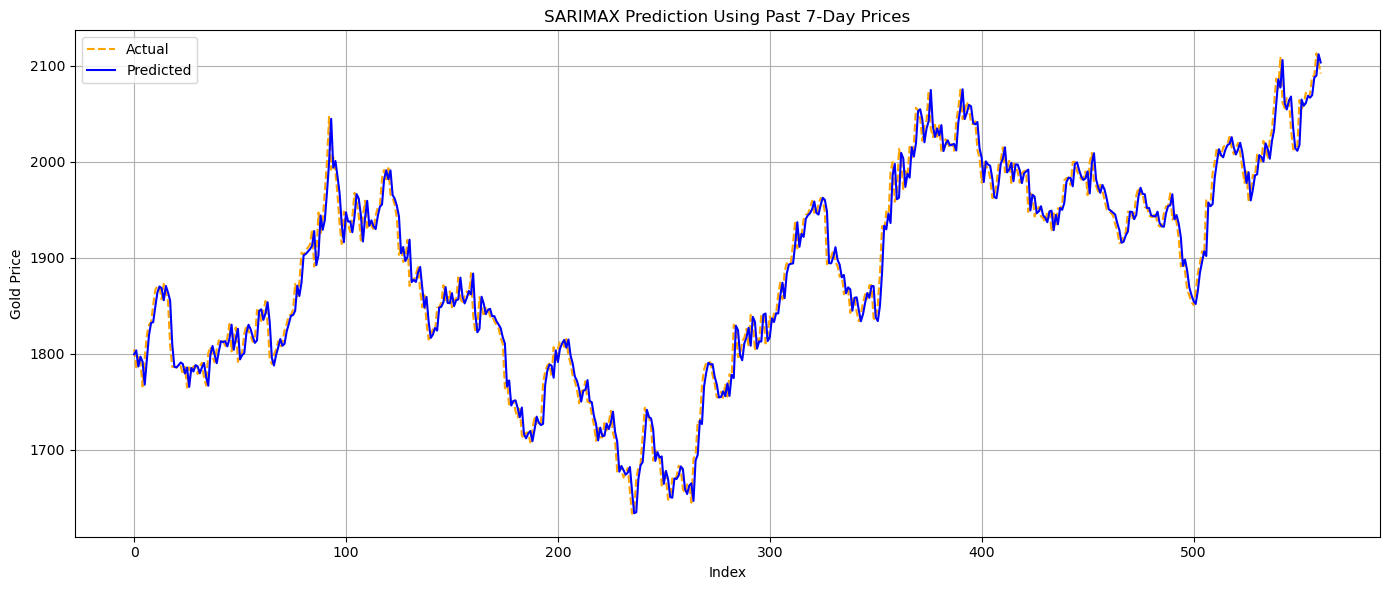

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Prophet\gold_price_data.csv", parse_dates=["Date"])
df = df.sort_values("Date")
df.replace(",", "", regex=True, inplace=True)
df["Price"] = df["Price"].astype(float)

# Create 7 lag features
for i in range(1, 8):
    df[f"lag{i}"] = df["Price"].shift(i)

# Drop NaN rows caused by shifting
df.dropna(inplace=True)

# Target and features
y = df["Price"]
X = df[[f"lag{i}" for i in range(1, 8)]]

# Train/test split
split_index = int(len(df) * 0.8)
y_train, y_test = y[:split_index], y[split_index:]
X_train, X_test = X[:split_index], X[split_index:]

# Fit SARIMAX with lag features
model = SARIMAX(y_train, exog=X_train, order=(0, 0, 0))
model_fit = model.fit()

# Predict
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, forecast))
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast) * 100

print(f"SARIMAX with 7-day window RMSE: {rmse:.2f}")
print(f"SARIMAX with 7-day window MAE: {mae:.2f}")
print(f"SARIMAX with 7-day window MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Actual", linestyle='--', color='orange')
plt.plot(forecast.values, label="Predicted", color='blue')
plt.title("SARIMAX Prediction Using Past 7-Day Prices")
plt.xlabel("Index")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# ✅ Use only the 7 most recent 'Price' values (most recent first)
latest_7_prices = [
    3342.90, 3321.40, 3376.90, 3369.00, 
    3346.50, 3335.47, 3354.97  # Most recent 7 closing prices (Jul 10 to Jul 04)
]

# 🔁 Reverse to match lag1 = yesterday, lag2 = 2 days ago, ...
latest_7_prices = latest_7_prices[::-1]

# ➕ Reshape for model input
latest_input_array = np.array(latest_7_prices).reshape(1, -1)

# 🔮 Predict the next day's price using SARIMAX
next_day_prediction = model_fit.forecast(steps=1, exog=latest_input_array).iloc[0]
print(f"📈 Predicted Gold Price (Next Day): {next_day_prediction:.2f}")


📈 Predicted Gold Price (Next Day): 3353.11


c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [3]:
import pickle

# Save the trained SARIMAX model
with open("SarimaxModel.pkl", "wb") as f:
    pickle.dump(model_fit, f)
